# EDA notebook - Cleaning

In [1]:
# import necessar libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import data_preparation as dp

In [2]:
# read data
house = pd.read_csv("../data/kc_house_data.csv")

# drop irrelevant columns
house.drop(['id',
            'date',
            'zipcode', 
            'lat', 
            'long', 'sqft_above',
            'sqft_living15', 
            'sqft_lot15'], axis = 1, inplace=True)

In [3]:
house.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,0.0,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,400.0,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,0.0,1933,NaN


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 2.1+ MB


## Handling Missing Values
Below shows all column with the number of missing values.

In [5]:
house.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated     3842
dtype: int64

In [6]:
house_no_missing = house.copy()
house_no_missing = dp.missing(house_no_missing)

In [7]:
house_no_missing.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_basement    0
yr_built         0
is_renovated     0
dtype: int64

Comparison of "waterfront" column before and after cleaning

In [8]:
house.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
house_no_missing.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

Comparison of "view" column before and after cleaning

In [10]:
house.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
house_no_missing.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

Comparison of renovation information before and after cleaning

In [12]:
house.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
house_no_missing.is_renovated.value_counts()

NO     20853
YES      744
Name: is_renovated, dtype: int64

### Basic cleaning, Simplification
Several columns are modified for better data quality and less complexity of analysis.
- The "view" column is updated to a binary column.
- The "condition" column has values of ratings. Ratings with relatively low counts are combined to reduce variance.
- The "grade" column has values of ratings. The same modification done to the "condition" column is applied to this column.
- The "sqft_basement" column has zeroes and missing values. This column is converted to a binary column to store if the house has a basement or not.

In [14]:
house_cleaned = house_no_missing.copy()
house_cleaned = dp.cleaning(house_cleaned)

Comparison of "waterfront" column before and after simplification

In [15]:
house.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [16]:
house_cleaned.view.value_counts()

NONE    19485
YES      2112
Name: view, dtype: int64

Comparison of "condition" column before and after simplification

In [17]:
house.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [18]:
house_cleaned.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           199
Name: condition, dtype: int64

Comparison of "grade" column before and after simplification

In [19]:
house.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [20]:
house_cleaned.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2308
10 Very Good     1134
11 Excellent      501
Name: grade, dtype: int64

Comparison of basement information before and after simplification

In [21]:
house.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
2390.0        1
1548.0        1
1245.0        1
2300.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
house_cleaned.has_basement.value_counts()

NO     13280
YES     8317
Name: has_basement, dtype: int64

The overall information after cleaning so far before taking further steps

In [23]:
house_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21597 non-null  float64
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   sqft_living   21597 non-null  int64  
 4   sqft_lot      21597 non-null  int64  
 5   floors        21597 non-null  float64
 6   waterfront    21597 non-null  object 
 7   view          21597 non-null  object 
 8   condition     21597 non-null  object 
 9   grade         21597 non-null  object 
 10  yr_built      21597 non-null  int64  
 11  is_renovated  21597 non-null  object 
 12  has_basement  21597 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.1+ MB


### Cleaning for Numerical Columns - Log Transformation and Normalization
Histogram comparison before and after transformation for numerical columns

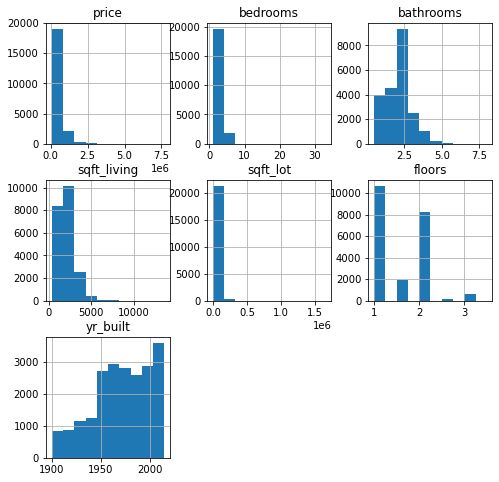

In [24]:
house_cleaned.hist(figsize  = [8, 8]);

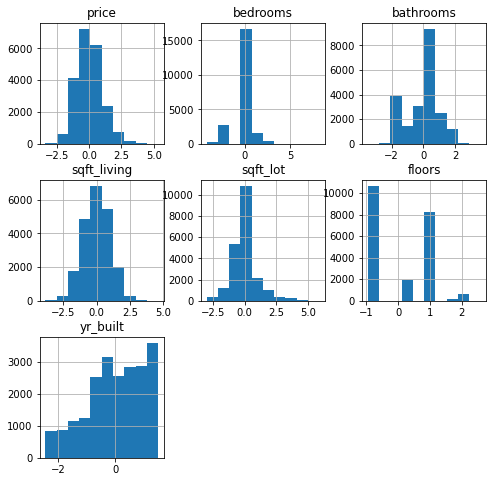

In [25]:
house_num_final = house_cleaned.copy()
house_num_final = dp.numeric_transform(house_num_final)
house_num_final.hist(figsize  = [8, 8]);

### Cleaning for Categorical Columns - Encoding Binaries and Multi-categories
The binary columns are encoded as 1's and 0's.

The columns with multiple categories are transformed into the same number of binary columns as the number of categories minus 1. The first binary column is removed to reduce multicollinearity.

In [26]:
house_cat_final = house_cleaned.copy()
house_cat_final = dp.categorical_tansformation(house_cat_final)

Columns with binary values

In [27]:
house_cat_final.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [28]:
house_cat_final.view.value_counts()

0.0    19485
1.0     2112
Name: view, dtype: int64

In [29]:
house_cat_final.is_renovated.value_counts()

0.0    20853
1.0      744
Name: is_renovated, dtype: int64

In [30]:
house_cat_final.has_basement.value_counts()

0.0    13280
1.0     8317
Name: has_basement, dtype: int64

The columns with multi-categorical values are displayed in the next step. Please refer to '#' column from 11 to the end.

### Final Concatenation

In [31]:
# final merge of numericals and categoricals
house_final = dp.concatenation(house_num_final, house_cat_final)

In [32]:
house_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  float64
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  float64
 4   sqft_lot             21597 non-null  float64
 5   floors               21597 non-null  float64
 6   yr_built             21597 non-null  float64
 7   waterfront           21597 non-null  float64
 8   view                 21597 non-null  float64
 9   is_renovated         21597 non-null  float64
 10  has_basement         21597 non-null  float64
 11  condition_Fair       21597 non-null  uint8  
 12  condition_Good       21597 non-null  uint8  
 13  condition_Very Good  21597 non-null  uint8  
 14  grade_11 Excellent   21597 non-null  uint8  
 15  grade_6 Low Average  21597 non-null 